# What could go wrong

### Introduction

In the last lesson, we saw that given data that is generated by a simple linear regression formula and a set of inputs, our machine learning model can find the parameters of that simple linear regression formula.  

It simply trains against the feature and target variables, and then finds the corresponding equation that perfectly aligns with the data.

In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jigsawlabs-student/train-test-split/master/3-irreducible-error/perfect_customers.csv"
df = pd.read_csv(url, index_col = 0)
X = df[['temperatures']]
y = df['customers']
perfect_model = LinearRegression().fit(X, y)

In [7]:
perfect_model.coef_

array([3.])

In [8]:
perfect_model.intercept_

9.999999999999915

But as we know, things are never so straightforward.

### Introducing Randomness

So in the last lesson, we trained a model that discovered the true underlying model of: 

$$ customers = 3*temperature + 10$$

This time, let's update our underlying model to be the following:

$$ customers = 3*temperature_i + 10 + \epsilon_i $$

This updated model displays two underlying beliefs:

1. There is a relationship between the number of customers that visit a restaurant and the temperature.  
2. But there are also random fluctuations in our data that unrelated to the temperature.

Those random fluctuations are represented by the term $\epsilon_i$.

Here are some examples of what could cause some of the random variations in the number of customers.  The number of customers who visit the restaurant could change based on the potential customers':

* mood for our type of food
* leftover food in their apartment
* overall health, like if a customer stubs his toe

Now you could argue that one day we could somehow capture and account for each of these scenarios.  However, even if we did, each of these factors is so small, so infrequent that it's simply too time consuming to include this in our model.  We call these influences random.  In the real world, all of our datasets are subject to randomness.

### Modeling Randomness

For now, we'll continue to use the `perfect_model` we trained in the last lesson.  After all, it has discovered the underlying features of $\theta_1 = 3$ and $\theta_2 = 10$.  

But here, we'll use the `perfect_model` to predict a dataset that has random errors in it.  We can generate the by first creating some errors, and then adding them to the dataset.

In [17]:
# 1. Generate random errors
import numpy as np
from numpy.random import randint
rand_errors = randint(-30,30, 50)

# Then we add the random errors
rand_y = y + rand_errors

In [19]:
y[:3]

0    220
1    145
2    166
Name: customers, dtype: int64

In [18]:
rand_y[:3]

0    244
1    158
2    146
Name: customers, dtype: int64

Then we reshape our temperatures to be a list, so we can plot them.

In [25]:
reshaped_temps = X.to_numpy().reshape(-1)
reshaped_temps[:3]

array([70, 45, 52])

Let's plot our data.

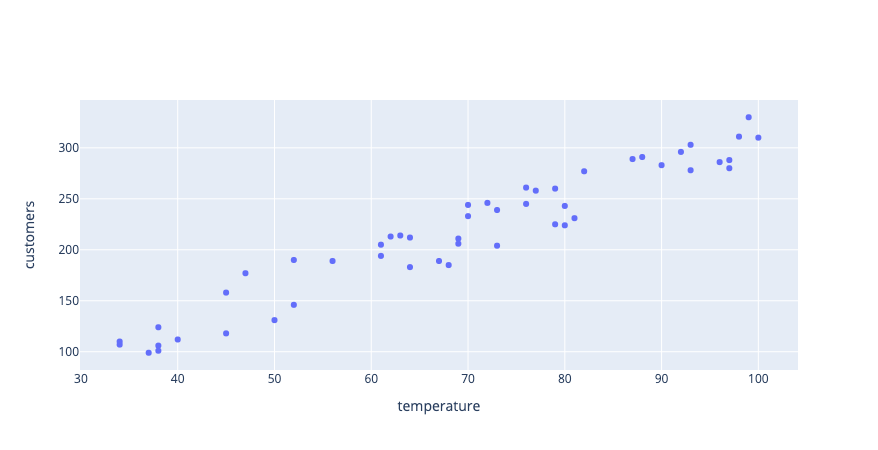

In [28]:
import plotly.graph_objects as go
data_trace = go.Scatter(x = reshaped_temps, y = rand_y, name = 'data with randomness', mode = 'markers')

layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
go.Figure([data_trace], layout = layout)

So as you can see, our data still does follow a trend, after all it is simply following the formula $ y = 3x + 10 + \epsilon $.  However, now our data does not lie perfectly along the line.  Let's call this our *noisy data*.  Another word for error, is noise.

### Using our perfect model 

Now that we have some random data, let's see how well we can a machine learning model can predict this noisy data.  

Now normally, we would do this by training our model with this data.  But here,  **we can actually do better than that**. 

Remember, the whole purpose of a machine learning algorithm is to discover the underlying true model from the data.  And in this case, *we know* the true model: it's $y = 3x + 10$.  And these are the parameters of our `perfect_model`.

Ok, so now let's see how well this `perfect_model` predicts our imperfect random data.

In [45]:
customer_predictions[:3]

array([220., 145., 166.])

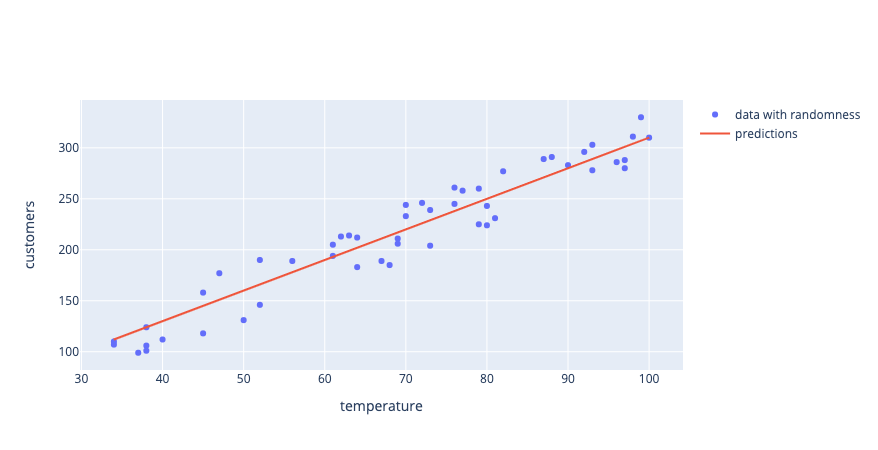

In [48]:
from graph import trace_values, plot

customer_predictions = perfect_model.predict(X)

model_trace = go.Scatter(x = reshaped_temps, y = customer_predictions, 
                         name = 'predictions', mode = 'lines')
plot([data_trace, model_trace], layout = layout)

In [38]:
perfect_model.score(X, rand_y)

0.9258847914033178

So it does quite a good job, but obviously worse than when we had our perfect dataset.  The question is this: 

*Can we train a machine learning model that does any better?*

The answer, is, **no**.

Do you see why?  We have a machine learning algorithm that estimated the underlying model of $\hat{y} = 3x + 10$.  It's impossible for the model to predict the random error, because by definition this type of error is random.

In fact another word for this error, is *irreducible error* because this is error that we as data scientists cannot reduce.  We cannot predict a random process.

### Subject to the whims

The last thing to note about this irreducible error, is that we can have a lot of it, or a little of it.  The more random error we have, the smaller our score.  Let's see this.

We'll have our errors range between positive and negative 50 (instead of 30).

In [30]:
larger_rand_errors = randint(-50,50, 50)
customers_with_larger_errors = y + rand_errors

In [33]:
perfect_model.score(X, customers_with_larger_errors)

0.7990926031979059

So we can see that the larger the random error, the less well we can predict the data.

### Summary

In this lesson, we learned a couple of things.  

First, we continued our journey of learning how to construct a dataset.  This time, we used two different datasets -- one with perfect data, which we used to train our model in a previous lesson.  And we also constructed a separate dataset that had random errors in it.

We saw that even when we have a perfectly trained model that discovered the true underlying parameters, it still cannot predict the random errors.  The score of our model reflects this.  And we cannot do anything to improve upon it.  This is because by definition it is impossible to predict randomness.  

Finally, we saw that the more that randomness plays a role in generating our outcomes, the less well that we can predict those outcomes.